In [54]:
import pandas as pd
df= pd.read_csv("google_bench.csv",index_col=0 )

In [55]:
df

,rec_name,pred,sentence
0,0.wav,ما اطول عودك,ما أطول عودك!
1,1.wav,ماتت عمتي منذ سنتين,ماتت عمتي منذ سنتين.
2,10.wav,انان وشجعوا مساهمتكم,إننا نشجع مساهمتكم.
3,100.wav,لمن هذه الكتب,لمن هذه الكتب ؟
4,101.wav,اندلع حريق وربانزل,.اندلع حريق قرب منزلي
...,...,...,...
147,74.wav,ايه اللي هو يعزف هو على البيانو افضل مني,إنه يعزف على البيانو أفضل مني.
148,75.wav,انتقم على موتى ابيه,انتقم لموت أبيه.
149,76.wav,هل اغلقت النافذه من فضلك,هلّا أغلقت النافذة من فضلك ؟
150,77.wav,طالعها في قاموسك,طالعها في قاموسك.


In [56]:
from metrics import STTEvaluationMetrics

In [28]:
k=1
# Instantiate the STTEvaluationMetrics object
eval_metrics = STTEvaluationMetrics()

# Set the reference and hypothesis columns
eval_metrics.set_reference_column('sentence')
eval_metrics.set_hypothesis_column('pred')

# Calculate the evaluation metrics
wer = eval_metrics.calculate_wer(df_clean)
cer = eval_metrics.calculate_cer(df_clean)
accuracy = eval_metrics.calculate_accuracy(df_clean)

print(f"Word Error Rate (WER): {wer}")
print(f"Character Error Rate (CER): {cer}")
print(f"Accuracy: {accuracy}")

NameError: name 'STTEvaluationMetrics' is not defined

In [22]:
df[:k]

,rec_name,pred,sentence
0,0.wav,ما اطول عودك,ما أطول عودك!


In [57]:
import re

def remove_punctuation(text):
    return re.sub(r'[^\w\s]', '', text)

In [58]:
df[:k]["sentence"].apply(remove_punctuation)

0    ما أطول عودك
Name: sentence, dtype: object

In [59]:
df_clean = df.copy()

In [53]:
df_clean["pred"].apply(len).argmin()

60

In [54]:
df_clean["pred"][60]

'عفوا'

<Axes: >

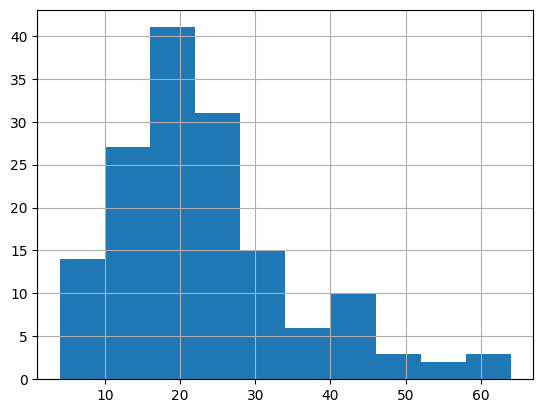

In [50]:
df_clean["pred"].apply(len).hist()

In [46]:
[len(x)  for x in df_clean["pred"].values ]

False

In [60]:
df_clean["sentence"] = df_clean["sentence"].apply(remove_punctuation)

In [37]:
df_clean[:k]

,rec_name,pred,sentence
0,0.wav,ما اطول عودك,ما أطول عودك


In [61]:
df_clean["sentence"]=df_clean["sentence"].str.replace("أ"  ,"ا")
df_clean["sentence"]=df_clean["sentence"].str.replace("آ"  ,"ا")
df_clean["sentence"]=df_clean["sentence"].str.replace("إ"  ,"ا")

In [62]:
# Set the reference and hypothesis columns
eval_metrics.set_reference_column('sentence')
eval_metrics.set_hypothesis_column('pred')

# Calculate the evaluation metrics
wer = eval_metrics.calculate_wer(df_clean)
cer = eval_metrics.calculate_cer(df_clean)
accuracy = eval_metrics.calculate_accuracy(df_clean)

print(f"Word Error Rate (WER): {wer}")
print(f"Character Error Rate (CER): {cer}")
print(f"Accuracy: {accuracy}")

Word Error Rate (WER): 0.43833595132937253
Character Error Rate (CER): 0.3912089007483744
Accuracy: 0.5679264996699206


In [3]:
df_eng = pd.read_csv("google_eng_eval.csv" ,index_col=0)
df_eng

,audio,pred
0,27.wav,as for her to love me as much or even more tha...
1,61.wav,not knowing what I was saying
2,80.wav,however Mercury's pleasure in seeing her frien...
3,0.wav,chapter 16
4,1.wav,Margaret to be unable to live apart for me
...,...,...
95,76.wav,a week later Marguerite was settled in her cou...
96,77.wav,on her side brought down all the people she kn...
97,78.wav,asking for a note for 1000 Franck professedly ...
98,79.wav,and fearing lest you could require more than I...


In [ ]:
df_eng_true = pd.read_csv("eng_data.csv",index_col=0)
df_eng_true["audio"] = df_eng_true.index + ".wav"

In [20]:
audio_names = [str(x) +".wav" for x in list(df_eng_true.index)]

In [22]:
df_eng_true["audio"] = audio_names

In [23]:
df_eng_true

,audio,text
0,0.wav,CHAPTER SIXTEEN I MIGHT HAVE TOLD YOU OF THE B...
1,1.wav,MARGUERITE TO BE UNABLE TO LIVE APART FROM ME ...
2,2.wav,I WISHED ABOVE ALL NOT TO LEAVE MYSELF TIME TO...
3,3.wav,ASSUMED ALL AT ONCE AN APPEARANCE OF NOISE AND...
4,4.wav,NOTHING IS SO EXPENSIVE AS THEIR CAPRICES FLOW...
...,...,...
95,95.wav,I WILL DO WITHOUT IT BUT WHAT WILL YOU DO I DO...
96,96.wav,COVERING HER HANDS WITH TEARS IN MY JOY AT BEI...
97,97.wav,NO MORE BARRIERS MY MARGUERITE WE LOVE WHAT MA...
98,98.wav,AND I WILL SAY GOOD BYE FOREVER TO THE LIFE FO...


In [26]:
df_eng_bench = pd.merge(df_eng_true , df_eng ,on="audio")
df_eng_bench.to_csv("eng_google_bench.csv")

In [51]:
df_clean = df_eng_bench[~df_eng_bench["pred"].isna()]

In [52]:
# Instantiate the STTEvaluationMetrics object
eval_metrics = STTEvaluationMetrics()

# Set the reference and hypothesis columns
eval_metrics.set_reference_column('text')
eval_metrics.set_hypothesis_column('pred')

# Calculate the evaluation metrics
wer = eval_metrics.calculate_wer(df_clean)
cer = eval_metrics.calculate_cer(df_clean)
accuracy = eval_metrics.calculate_accuracy(df_clean)

print(f"Word Error Rate (WER): {wer}")
print(f"Character Error Rate (CER): {cer}")
print(f"Accuracy: {accuracy}")

Word Error Rate (WER): 0.9816604063446893
Character Error Rate (CER): 0.9814478213106758
Accuracy: 0.007596410610521246


In [53]:
df_clean

,audio,text,pred
0,0.wav,CHAPTER SIXTEEN I MIGHT HAVE TOLD YOU OF THE B...,chapter 16
1,1.wav,MARGUERITE TO BE UNABLE TO LIVE APART FROM ME ...,Margaret to be unable to live apart for me
2,2.wav,I WISHED ABOVE ALL NOT TO LEAVE MYSELF TIME TO...,I wish to myself time to think over the positi...
3,3.wav,ASSUMED ALL AT ONCE AN APPEARANCE OF NOISE AND...,order never believe however disinterested the ...
4,4.wav,NOTHING IS SO EXPENSIVE AS THEIR CAPRICES FLOW...,flowers boxes of the theater Trappers the coun...
...,...,...,...
95,95.wav,I WILL DO WITHOUT IT BUT WHAT WILL YOU DO I DO...,I will do without it what will you do
96,96.wav,COVERING HER HANDS WITH TEARS IN MY JOY AT BEI...,covering her hands with love
97,97.wav,NO MORE BARRIERS MY MARGUERITE WE LOVE WHAT MA...,no more barriers my Marguerite we love what ma...
98,98.wav,AND I WILL SAY GOOD BYE FOREVER TO THE LIFE FO...,and I will take you forever to the life for wh...
